# **KLASIFIKASI** **BERITA**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# 2️⃣ Load Data
from google.colab import files; uploaded = files.upload()
data = pd.read_csv('/content/Berita.csv')

print("Contoh data:")
print(data.head())

Saving Berita.csv to Berita (1).csv
Contoh data:
   No                                              judul  \
0   1  Airlangga Harap Kenaikan UMP Tingkatkan Daya B...   
1   2  PT SIER Beri Penghargaan untuk 50 Tenant Terba...   
2   3  Prabowo Bakal Bentuk Kementerian Penerimaan Ne...   
3   4  Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...   
4   5  Pemerintah Segera Bentuk Satgas PHK Usai Tetap...   

                                              berita  \
0  Menteri Koordinator (Menko) Bidang Perekonomia...   
1  Dalam rangka memeriahkan hari jadi ke-50, PT S...   
2  Wacana Presiden Prabowo Subianto akan membentu...   
3  BPJS Ketenagakerjaan dan Kementerian Agama (Ke...   
4  Pemerintah akan segera membentuk Satuan Tugas ...   

                         tanggal kategori  \
0  Minggu, 01 Des 2024 23:40 WIB  Ekonomi   
1  Minggu, 01 Des 2024 20:45 WIB  Ekonomi   
2  Minggu, 01 Des 2024 19:40 WIB  Ekonomi   
3  Minggu, 01 Des 2024 19:03 WIB  Ekonomi   
4  Minggu, 01 Des 2024 19:00

In [5]:
# 3️⃣ Preprocessing Text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # hapus URL
        text = re.sub(r'\d+', '', text)  # hapus angka
        text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
        text = text.strip()
        tokens = [word for word in text.split() if word not in stop_words]  # hapus stopword
        return " ".join(tokens)
    else:
        return ""

In [7]:
# Ganti nama kolom sesuai dataset kamu (misal: 'Isi_Berita' dan 'Kategori')
text_col = 'berita'     # kolom teks berita
label_col = 'kategori'      # kolom kategori

data[text_col] = data[text_col].astype(str).apply(preprocess_text)

print("\nSetelah preprocessing:")
print(data.head())


Setelah preprocessing:
   No                                              judul  \
0   1  Airlangga Harap Kenaikan UMP Tingkatkan Daya B...   
1   2  PT SIER Beri Penghargaan untuk 50 Tenant Terba...   
2   3  Prabowo Bakal Bentuk Kementerian Penerimaan Ne...   
3   4  Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...   
4   5  Pemerintah Segera Bentuk Satgas PHK Usai Tetap...   

                                              berita  \
0  menteri koordinator menko bidang perekonomian ...   
1  rangka memeriahkan pt surabaya industrial esta...   
2  wacana presiden prabowo subianto membentuk mem...   
3  bpjs ketenagakerjaan kementerian agama kemenag...   
4  pemerintah membentuk satuan tugas pemutusan hu...   

                         tanggal kategori  \
0  Minggu, 01 Des 2024 23:40 WIB  Ekonomi   
1  Minggu, 01 Des 2024 20:45 WIB  Ekonomi   
2  Minggu, 01 Des 2024 19:40 WIB  Ekonomi   
3  Minggu, 01 Des 2024 19:03 WIB  Ekonomi   
4  Minggu, 01 Des 2024 19:00 WIB  Ekonomi   

       

In [18]:
# Ambil kolom yang dibutuhkan dan hilangkan baris kosong
df = df[[text_col, label_col]].dropna()
df['text'] = df[text_col].astype(str)
df['label'] = df[label_col].astype(str).str.strip()

print(f"Jumlah data setelah dibersihkan: {len(df)}")
print("Kategori unik:", df['label'].unique())

Jumlah data setelah dibersihkan: 1500
Kategori unik: ['Ekonomi' 'Olahraga' 'Nasional' 'Internasional']


In [8]:
# 4️⃣ Pisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    data[text_col], data[label_col],
    test_size=0.2, random_state=42, stratify=data[label_col]
)


In [10]:
# 5️⃣ Ekstraksi Fitur dengan LDA
# Step 1: Vectorize teks dengan CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Step 2: Latent Dirichlet Allocation (LDA)
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
X_train_lda = lda_model.fit_transform(X_train_counts)
X_test_lda = lda_model.transform(X_test_counts)

print("\nContoh distribusi topik (fitur LDA):")
print(X_train_lda[:5])


Contoh distribusi topik (fitur LDA):
[[6.30420641e-02 1.13645720e-03 1.13650149e-03 1.13650563e-03
  1.35056884e-02 4.30245698e-01 1.13648275e-03 1.13646563e-03
  1.29062816e-01 3.58461321e-01]
 [5.46603925e-04 5.46563181e-04 5.46536518e-04 5.46522275e-04
  4.89026170e-01 9.26010189e-02 4.14546808e-01 5.46605353e-04
  5.46621188e-04 5.46550693e-04]
 [5.52519580e-04 6.42858138e-01 3.52721512e-01 5.52520938e-04
  5.52502424e-04 5.52543143e-04 5.52573884e-04 5.52533765e-04
  5.52559991e-04 5.52596608e-04]
 [9.70942299e-04 9.71462954e-04 9.70979224e-04 9.71800345e-04
  9.70949349e-04 8.08082173e-01 9.71029049e-04 9.71064347e-04
  1.84148581e-01 9.71018647e-04]
 [4.50614589e-04 4.50468601e-04 4.50539734e-04 4.50487333e-04
  1.63084598e-02 9.80087262e-01 4.50533839e-04 4.50619517e-04
  4.50505412e-04 4.50509330e-04]]


In [12]:
# Tampilkan beberapa topik
def show_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topik {idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("")

show_topics(lda_model, vectorizer.get_feature_names_out(), 10)

Topik 1:
korban, yoon, pelaku, darurat, korea, polisi, cnn, militer, indonesia, gunung

Topik 2:
gol, pemain, menit, indonesia, piala, laga, pertandingan, aff, vietnam, liga

Topik 3:
indonesia, timnas, pelatih, piala, dunia, kluivert, pssi, pemain, tim, shin

Topik 4:
red, sparks, megawati, poin, pt, pink, voli, sertifikat, spiders, kemenangan

Topik 5:
laut, pagar, tangerang, nelayan, kkp, misterius, desa, perikanan, kelautan, km

Topik 6:
kebakaran, orang, kpk, korban, los, warga, rumah, angeles, tersangka, hasto

Topik 7:
persen, ppn, prabowo, presiden, pemerintah, jakarta, pajak, jasa, rp, kenaikan

Topik 8:
rp, program, makan, juta, bergizi, harga, gratis, triliun, pangan, masyarakat

Topik 9:
israel, gaza, senjata, gencatan, indonesia, trump, negara, hamas, as, palestina

Topik 10:
presiden, pesawat, yoon, menteri, jakarta, kerja, negara, korsel, kementerian, selatan



In [17]:
# 6️⃣ Klasifikasi dengan Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_lda, y_train)
y_pred_nb = nb_model.predict(X_test_lda)

print("\n=== HASIL NAIVE BAYES ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


=== HASIL NAIVE BAYES ===
Akurasi: 0.8766666666666667

Classification Report:
                precision    recall  f1-score   support

      Ekonomi       0.76      0.99      0.86        75
Internasional       0.97      0.84      0.90        75
     Nasional       0.81      0.69      0.75        75
     Olahraga       1.00      0.99      0.99        75

     accuracy                           0.88       300
    macro avg       0.89      0.88      0.88       300
 weighted avg       0.89      0.88      0.88       300

Confusion Matrix:
 [[74  0  1  0]
 [ 1 63 11  0]
 [22  1 52  0]
 [ 0  1  0 74]]


In [18]:
# 7️⃣ Klasifikasi dengan SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_lda, y_train)
y_pred_svm = svm_model.predict(X_test_lda)

print("\n=== HASIL SVM ===")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



=== HASIL SVM ===
Akurasi: 0.86

Classification Report:
                precision    recall  f1-score   support

      Ekonomi       0.73      0.99      0.84        75
Internasional       0.98      0.83      0.90        75
     Nasional       0.78      0.63      0.70        75
     Olahraga       1.00      1.00      1.00        75

     accuracy                           0.86       300
    macro avg       0.87      0.86      0.86       300
 weighted avg       0.87      0.86      0.86       300

Confusion Matrix:
 [[74  0  1  0]
 [ 1 62 12  0]
 [27  1 47  0]
 [ 0  0  0 75]]


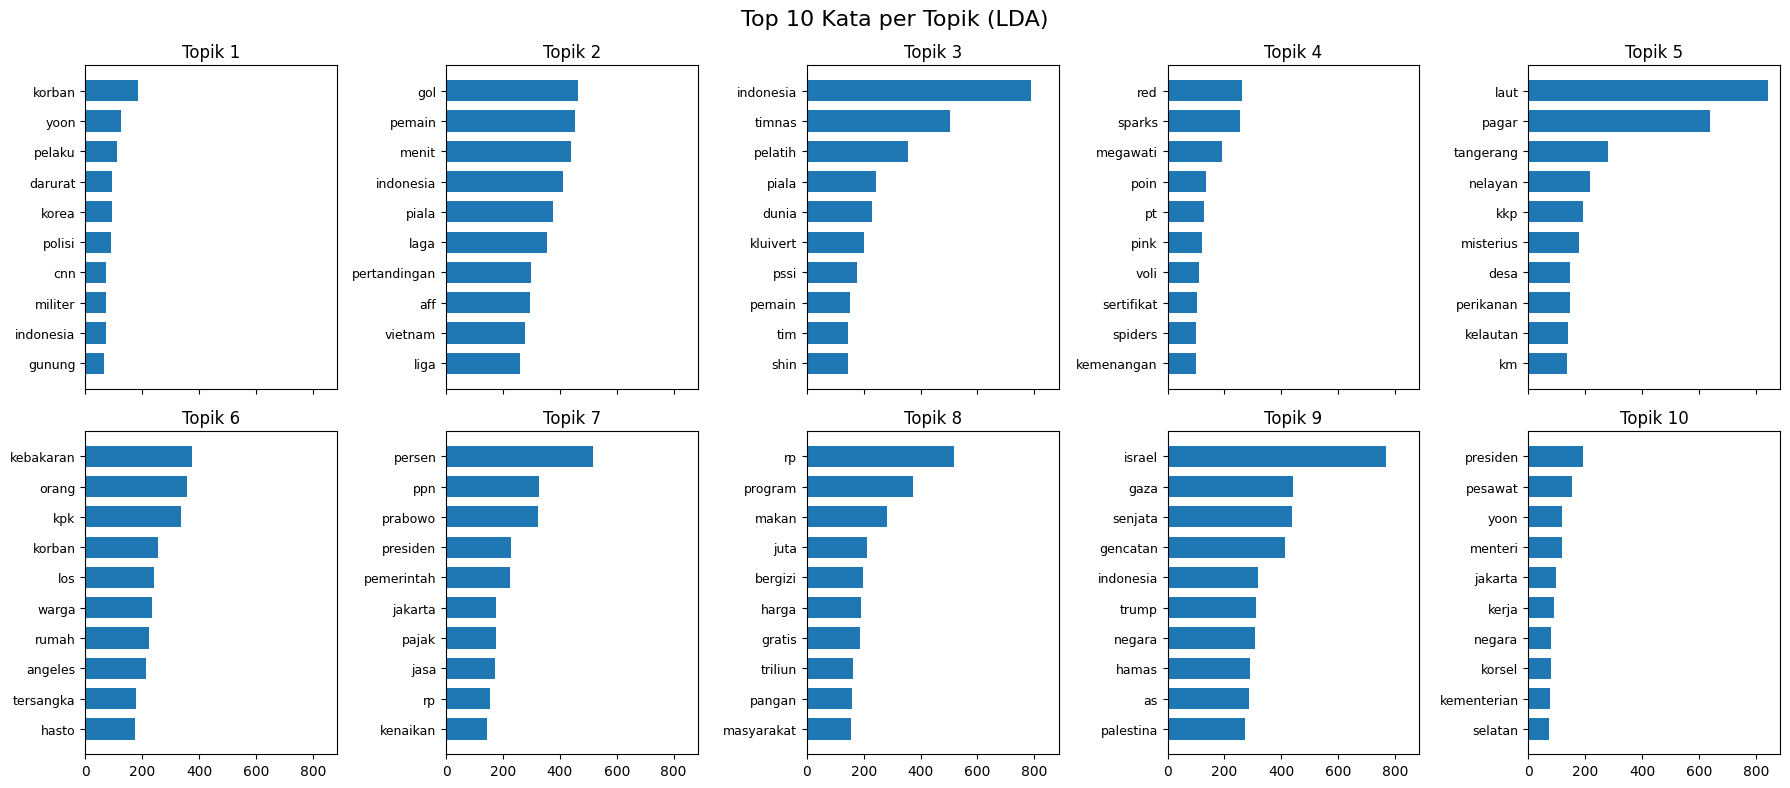

In [20]:
# 7️⃣ VISUALISASI MODEL
# ============================================
import matplotlib.pyplot as plt

# --- a. Visualisasi Top 10 kata per topik ---
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(18, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topik {topic_idx+1}", fontdict={'fontsize': 12})
        ax.invert_yaxis()
        ax.tick_params(axis='y', labelsize=9)
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

tf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda_model, tf_feature_names, 10, "Top 10 Kata per Topik (LDA)")

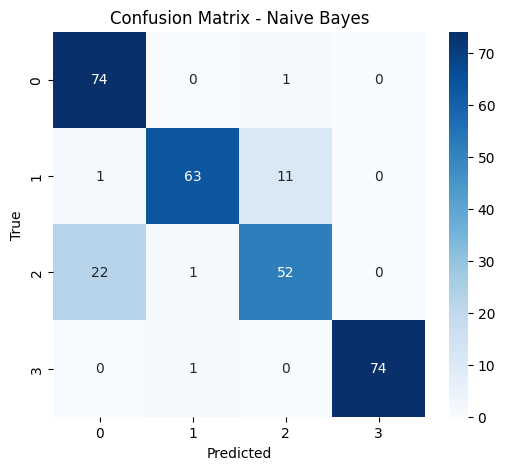

In [23]:
# --- b. Confusion Matrix Naive Bayes ---
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

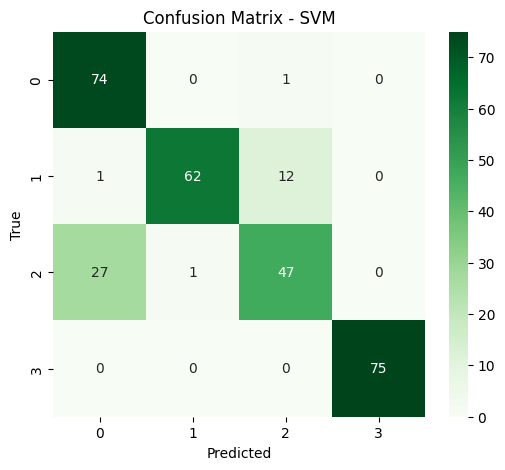

In [24]:
# --- c. Confusion Matrix SVM ---
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/tmp/ipython-input-643220476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Naïve Bayes', 'SVM'], y=[acc_nb, acc_svm], palette='viridis')


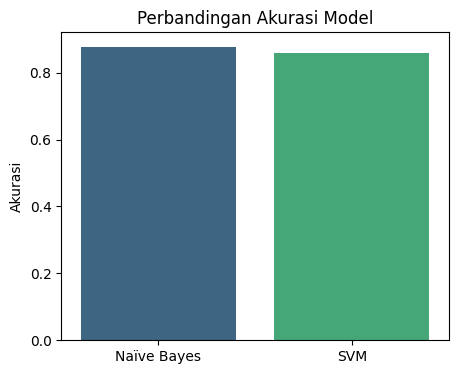

In [28]:
# --- d. Perbandingan Akurasi ---
plt.figure(figsize=(5,4))
sns.barplot(x=['Naïve Bayes', 'SVM'], y=[acc_nb, acc_svm], palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.show()


In [29]:
# Calculate accuracy scores
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_svm = accuracy_score(y_test, y_pred_svm)

# **EMAIL** **CLUSTERING**




In [30]:
!pip install wordcloud
!pip install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 93.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.

In [1]:
# 1. Import library
# ===============================
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from wordcloud import WordCloud

import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

In [2]:
# 2. Load data
# Jika file diupload lewat Colab, gunakan:
from google.colab import files
uploaded = files.upload()
# lalu pasang nama file sesuai yang diupload, mis. 'spam.csv'

df = pd.read_csv('/content/spam.csv', encoding='latin-1', low_memory=False)  # ubah path bila perlu
print("Kolom dataset:", df.columns.tolist())
display(df.head())

Saving spam.csv to spam.csv
Kolom dataset: ['id', 'Text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,5,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# 3. Detect kolom teks (robust)
# ===============================
# Coba beberapa nama umum; jika dataset berbeda, ubah 'text_col' secara manual.
possible_text_cols = ['text', 'message', 'v2', 'content', 'body', 'email', 'message_text']
text_col = None
for c in possible_text_cols:
    if c in df.columns:
        text_col = c
        break

        # jika gagal, ambil kolom non-numeric pertama sebagai teks
if text_col is None:
    for c in df.columns:
        if df[c].dtype == object:
            text_col = c
            break

 #jika gagal, ambil kolom non-numeric pertama sebagai teks
if text_col is None:
    for c in df.columns:
        if df[c].dtype == object:
            text_col = c
            break

if text_col is None:
    raise ValueError("Gagal menemukan kolom teks. Silakan ubah manual variabel text_col pada script.")

print("Menggunakan kolom teks:", text_col)



# Ambil hanya kolom teks, drop NA
data = df[[text_col]].dropna().rename(columns={text_col: 'text'}).reset_index(drop=True)
print("Jumlah dokumen:", len(data))



Menggunakan kolom teks: Text
Jumlah dokumen: 5572


In [4]:
# Ambil hanya kolom teks, drop NA
data = df[[text_col]].dropna().rename(columns={text_col: 'text'}).reset_index(drop=True)
print("Jumlah dokumen:", len(data))



Jumlah dokumen: 5572


In [5]:
# 4. Preprocessing teks (fungsi tahan banting)
# ===============================
# Coba stopwords bahasa Indonesia; jika tidak tersedia fallback ke bahasa Inggris.
try:
    stop_words = set(stopwords.words('indonesian'))
    print("Menggunakan stopwords: indonesian")
except Exception:
    stop_words = set(stopwords.words('english'))
    print("Fallback stopwords: english")

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    # hapus URL, email, angka, tanda baca, dan ekstra whitespace
    text = re.sub(r'\S+@\S+', ' ', text)          # hapus email addresses
    text = re.sub(r'http\S+|www\S+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    # hapus stopword (simple token split)
    tokens = [t for t in text.split() if t not in stop_words and len(t) > 1]
    return " ".join(tokens)

Menggunakan stopwords: indonesian


In [6]:
# Terapkan preprocessing
data['clean'] = data['text'].astype(str).apply(preprocess)
# Hapus dokumen kosong setelah pembersihan
data = data[data['clean'].str.strip() != ""].reset_index(drop=True)
print("Dokumen setelah preprocessing:", len(data))
display(data.head())


Dokumen setelah preprocessing: 5568


,text,clean
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in wkly comp to win fa cup final tk...
3,U dun say so early hor... U c already then say...,dun say so early hor already then say
4,"Nah I don't think he goes to usf, he lives aro...",dont think he goes to usf he lives around here...


In [7]:
# 5. Vectorize (CountVectorizer, tanpa TF-IDF)
# ===============================
vectorizer = CountVectorizer(max_features=4000, min_df=2)
X_counts = vectorizer.fit_transform(data['clean'])
print("Dimensi fitur (CountVectorizer):", X_counts.shape)


Dimensi fitur (CountVectorizer): (5568, 3832)


In [8]:
n_topics = 10   # ubah sesuai kebutuhan
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=12, random_state=42)
X_topics = lda.fit_transform(X_counts)   # bentuk: (n_docs, n_topics)
print("Dimensi fitur (LDA topic distribution):", X_topics.shape)

# Fungsi untuk menampilkan kata-kata topik
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print("Topik #%d: %s" % (topic_idx+1, ", ".join(top_words)))

print("\nKata dominan per topik (LDA):")
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words=8)



Dimensi fitur (LDA topic distribution): (5568, 10)

Kata dominan per topik (LDA):
Topik #1: your, you, to, call, is, for, not, he
Topik #2: the, and, that, is, to, dont, of, in
Topik #3: to, free, the, txt, or, on, for, ur
Topik #4: im, my, lor, then, so, me, but, go
Topik #5: ur, ok, your, urgent, from, dear, to, call
Topik #6: you, to, me, ill, call, in, later, now
Topik #7: the, to, for, you, can, it, in, if
Topik #8: to, call, the, now, have, only, just, and
Topik #9: ltgt, to, it, the, is, do, of, if
Topik #10: you, to, my, are, and, the, in, me


In [9]:
# 7. Menentukan jumlah cluster: Elbow & Silhouette (gunakan fitur LDA)

# Kita lakukan range kecil (2..8) untuk efisiensi
from sklearn.metrics import pairwise_distances_argmin_min

range_n = list(range(2, 9))
inertias = []
sil_scores = []
for k in range_n:
    kmeans_tmp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_tmp = kmeans_tmp.fit_predict(X_topics)
    inertias.append(kmeans_tmp.inertia_)
    try:
        sil = silhouette_score(X_topics, labels_tmp)
    except:
        sil = np.nan
    sil_scores.append(sil)

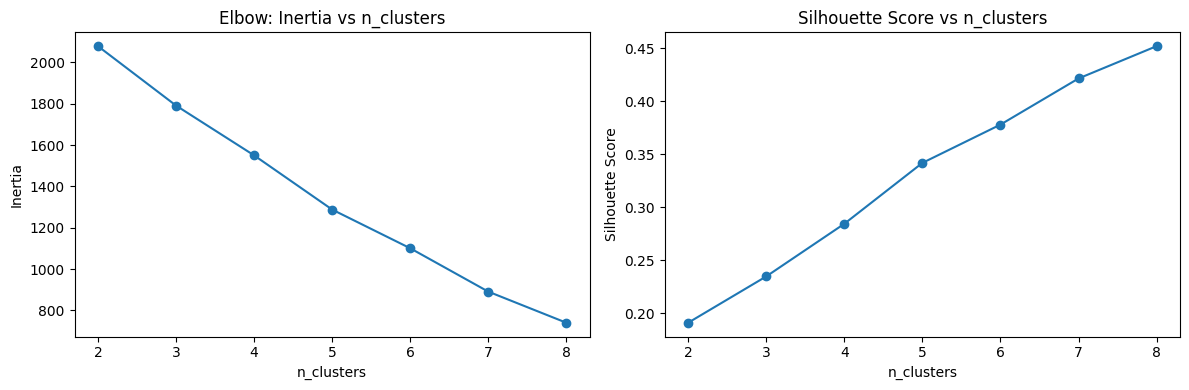

In [10]:
# Plot Elbow & Silhouette
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range_n, inertias, marker='o')
plt.title("Elbow: Inertia vs n_clusters")
plt.xlabel("n_clusters")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(range_n, sil_scores, marker='o')
plt.title("Silhouette Score vs n_clusters")
plt.xlabel("n_clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

In [11]:
# Pilih n_clusters berdasarkan plot di atas; default:
n_clusters = 5


In [12]:
# 8. Clustering akhir dengan KMeans

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_topics)
data['cluster'] = cluster_labels
print("\nDistribusi dokumen per cluster:")
print(data['cluster'].value_counts())

# Simpan centroid topik untuk analisa
centroids = kmeans.cluster_centers_



Distribusi dokumen per cluster:
cluster
2    2166
3    1215
1     847
4     716
0     624
Name: count, dtype: int64


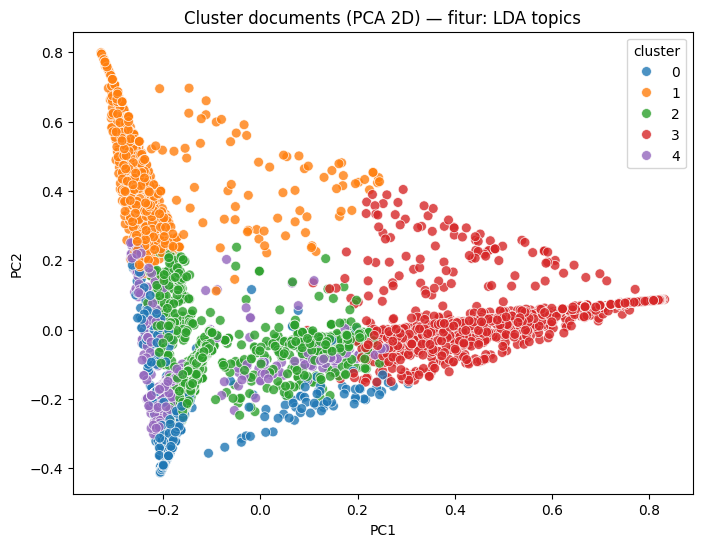

In [13]:
# 9. Visualisasi cluster (PCA 2D & t-SNE)
# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_topics)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='tab10', s=50, alpha=0.8)
plt.title("Cluster documents (PCA 2D) — fitur: LDA topics")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='cluster')
plt.show()

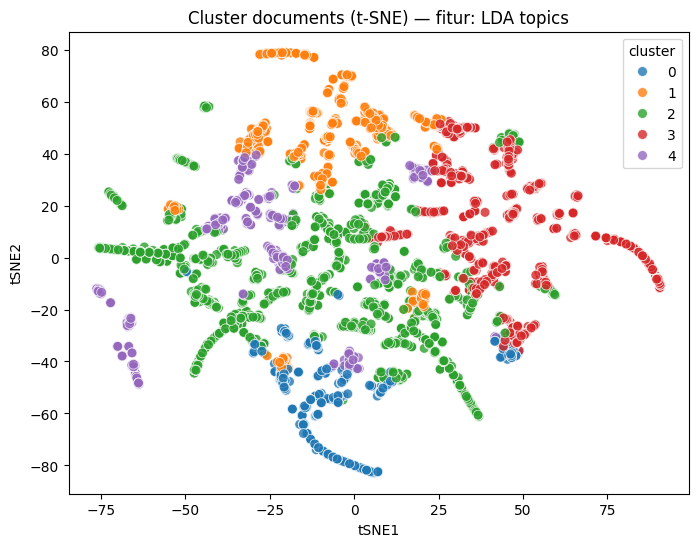

In [14]:
# t-SNE (lebih baik memvisualisasikan non-linear structure; bisa lambat)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, init='pca')
X_tsne = tsne.fit_transform(X_topics)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=cluster_labels, palette='tab10', s=50, alpha=0.8)
plt.title("Cluster documents (t-SNE) — fitur: LDA topics")
plt.xlabel("tSNE1"); plt.ylabel("tSNE2")
plt.legend(title='cluster')
plt.show()


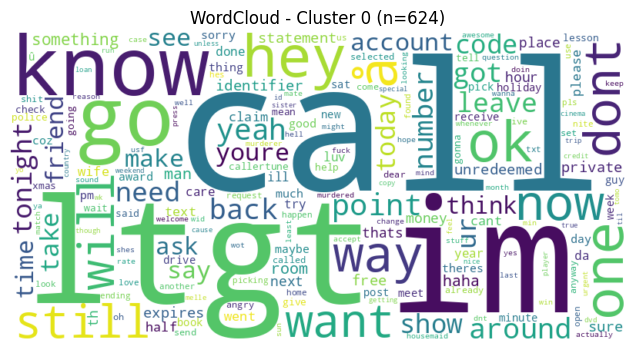

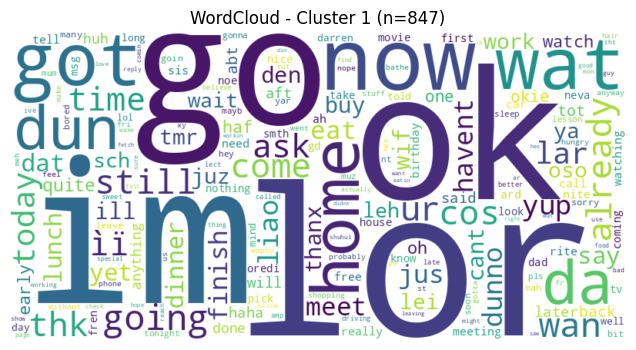

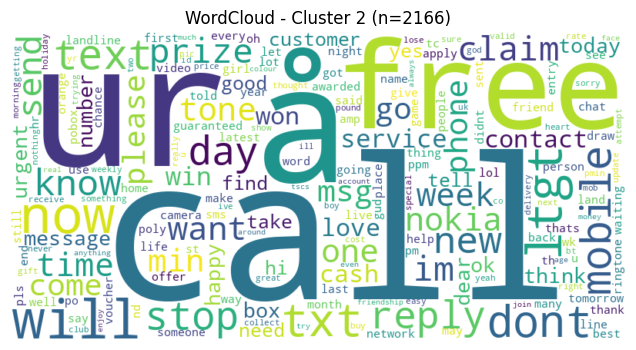

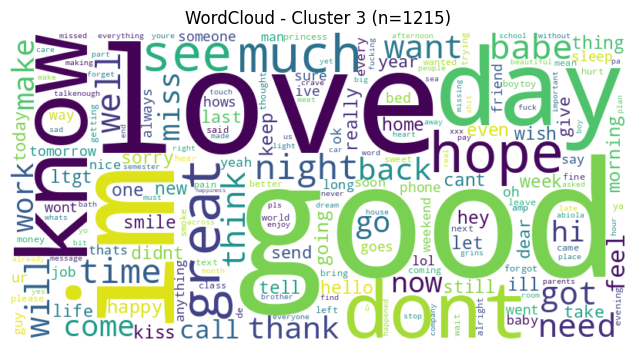

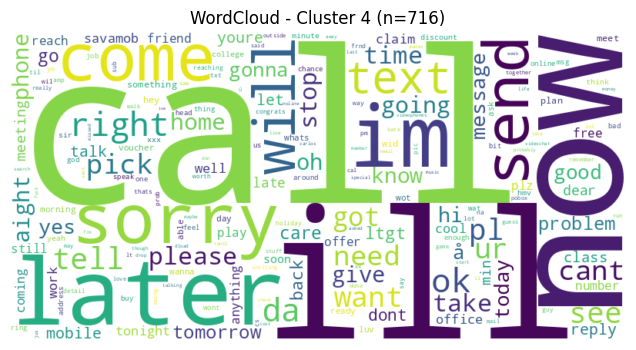

In [15]:
# 10. WordCloud per cluster (kata dominan)
# ===============================
for c in sorted(data['cluster'].unique()):
    texts = " ".join(data[data['cluster'] == c]['clean'].tolist())
    if len(texts.strip()) == 0:
        print(f"Cluster {c}: no text")
        continue
    wc = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(texts)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Cluster {c} (n={len(data[data['cluster']==c])})")
    plt.show()

In [16]:
# 11. Contoh dokumen per cluster (untuk inspeksi manual)
# ===============================
n_show = 5
for c in sorted(data['cluster'].unique()):
    print(f"\n--- Sample documents for cluster {c} (n={len(data[data['cluster']==c])}) ---")
    samples = data[data['cluster']==c].sample(min(n_show, len(data[data['cluster']==c])), random_state=42)['text'].tolist()
    for i, s in enumerate(samples, 1):
        print(f"[{i}] {s[:400]}{'...' if len(s)>400 else ''}\n")




--- Sample documents for cluster 0 (n=624) ---
[1]  &lt;#&gt;  in mca. But not conform.

[2] Men always needs a beautiful, intelligent, caring, loving, adjustable, cooperative wife. But the law allows only one wife....

[3] Dont know supports ass and srt i thnk. I think ps3 can play through usb too

[4] That's the way you should stay oh.

[5] S.i'm watching it in live..


--- Sample documents for cluster 1 (n=847) ---
[1] Cos darren say Ì_ considering mah so i ask Ì_...

[2] Dunno lei he neva say...

[3] Then u going ikea str aft dat?

[4] Ok.. ÌÏ finishing soon?

[5] Ok lor... Sony ericsson salesman... I ask shuhui then she say quite gd 2 use so i considering...


--- Sample documents for cluster 2 (n=2166) ---
[1] Yes ammae....life takes lot of turns you can only sit and try to hold the steering...

[2] Is it your yahoo boys that bring in the perf? Or legal.

[3] Love it! I want to flood that pretty pussy with cum...

[4] Kindly send some one to our flat before  &lt;DECIMAL&gt;  tod

In [17]:
output_path = '/content/email_clusters_result.csv'
data.to_csv(output_path, index=False)
print(f"\nHasil clustering disimpan ke: {output_path}")


Hasil clustering disimpan ke: /content/email_clusters_result.csv
